##### Input the Data set


In [2]:
import pandas as pd
import numpy as np
import sys
%pylab inline
# import the file
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)
#print first row
#print df.iloc[0]
#len(df)

Populating the interactive namespace from numpy and matplotlib


### 1 : Create a new column RESTAURANT

Steps:
1. Concatenate 5 columns of interest

In [3]:
df['restaurant']=df['DBA']+" "+ df['BUILDING']+" "+ df['STREET']+" "+ df['ZIPCODE']+" "+ df['BORO']
print df['restaurant'][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: restaurant, dtype: object


### 2 : Calculate the number of restaurants unique restaurants

Steps:
1. Use the column used in the first question
2. Drop the duplicates
3. Find the length of the unique restaurant list

In [4]:
uniq_rest= df.drop_duplicates(subset='restaurant')
print "Number of unique restaurants = " ,len(uniq_rest)

Number of unique restaurants =  10114


### 3 : Calculate number of chain restaurants

Steps :
1. Use the unique restaurant data frame used earlier by removing duplicates 
2. Count the number of restaurants at DBA 
3. Subset the DBAs for which there are more than 1 restaurants 

In [5]:
uniq_chain = uniq_rest['DBA'].value_counts()
#group by to calculate number of restaurants at DBA level
chain=uniq_rest.groupby('DBA', as_index=False).agg({"restaurant": "count"})
chain_rest=chain[chain['restaurant']>1]
no_chains= len(chain_rest)
print "Number of Chains are :" , no_chains

#chain_rest.iloc[:2]

Number of Chains are : 368


###  4 : Plot the top 20 most popular chains

Steps:
1. Use the chain restaurant data frame used earlier to count the number of restaurant per DBA
2. Sort the data frame based on the #restaurants
3. Use plot function to plot the bar graph


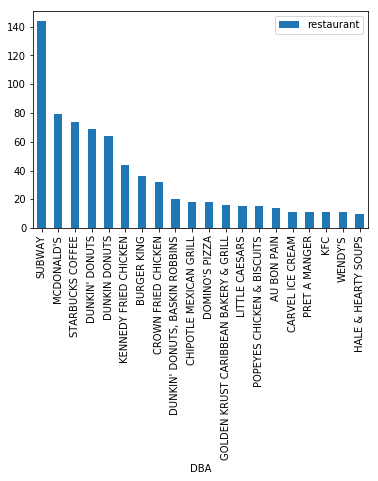

In [7]:
# sort in descending order
chain_rest_sort=chain_rest.sort_values(by='restaurant',ascending=False)
#print chain_rest_sort
chain_rest_sort.set_index('DBA', inplace=True)
top_chain=chain_rest_sort[:20]
top_chain.plot(kind='bar')



### 5 : What fraction of all restaurants are chain restaurants?

Steps:
1. Merge the above list of chain restaurant with left join to the unique restaurant data frame
2. Count the number of chain restaurants and divide it by total number of restaurants

In [6]:
# Merge and create a flag 
chain_org_rest = uniq_rest.merge(chain_rest, left_on='DBA',right_on='DBA',how='left',suffixes=['_org', '_chain'])
#chain_org_rest.iloc[0]

tot_rests= len(chain_org_rest)

chain_rests=chain_org_rest['restaurant_chain'].count()

print "Fraction of Chain Restaurants to total number of restaurants:", float(chain_rests)/tot_rests


Fraction of Chain Restaurants to total number of restaurants: 0.164722167293


### 6 : Plot the #non-chain restaurants in each boro

Steps:
1. Remove the rows with 'Missing' boros
2. In the above merge, nulls in the right table indicate non-chain restaurants. Filter out these resturants
3. Count their occurances and use plot function to plot the distribution


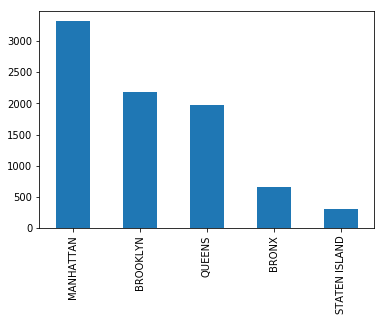

In [7]:
# Use merge function

treat_boro=chain_org_rest[chain_org_rest.BORO != 'Missing']
#print treat_boro.iloc[0]
non_chain_rest= treat_boro[treat_boro['restaurant_chain'].isnull()]
#print non_chain_rest.iloc[0]

# Aggregate the table based on Boro
boro_n_chains=non_chain_rest['BORO'].value_counts()
#print boro_n_chains

boro_n_chains.plot(kind='bar')


### 7 : Plot the fraction of non-chain restaurants

Steps:
1. Create a data frame from the boro wise count of restaurant
2. Join this data frame with boro level #chain count data frame
3. Take the fraction and plot the distribution

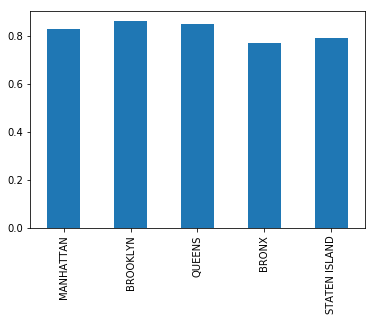

In [8]:
tot_rest=treat_boro['BORO'].value_counts()
tot_rest_1=pd.DataFrame(data=tot_rest)
boro_n_chains_1=pd.DataFrame(data=boro_n_chains)

# Merge both the datasets based on theor index
merged = tot_rest_1.merge(boro_n_chains_1, left_index=True, right_index=True, how='inner')

merged['non_chain_frac']=merged['BORO_y']/merged['BORO_x']
#print merged

merged['non_chain_frac'].plot(kind='bar')


### 8 : Plot the popularity of cuisines

Steps:
1. Create a data frame with unique restaurant - cuisine pairs
2. Count the #restaurants per cuisin ; sort it, and plot the distribution 

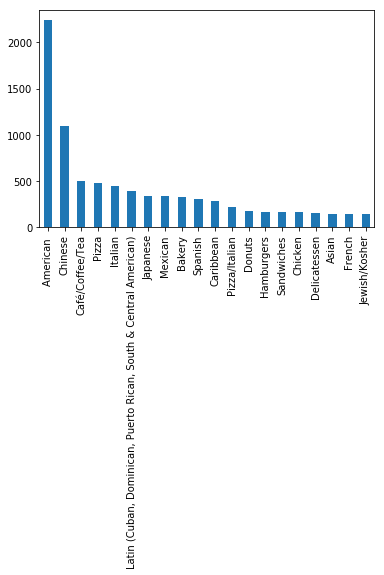

In [9]:
cuis_rest=df.drop_duplicates(subset=['restaurant','CUISINE DESCRIPTION'])
cuis_pop=cuis_rest['CUISINE DESCRIPTION'].value_counts()

top_cuis=cuis_pop[:20]
top_cuis.plot(kind='bar')


### 9 : Find the clean restaurants' top cuisines

Steps:
1. Create a list of restaurant with null violation code and another list with restaurants who have obtained the violation code
2. Find an exclusive list of restaurant,which have never cited any violation code by using merge (left) and finding null values for right table
3. For clean restaurants, get the cuisine information
4. Count the #restaurants per cuisin and sort them in descending order. Plot the distribution

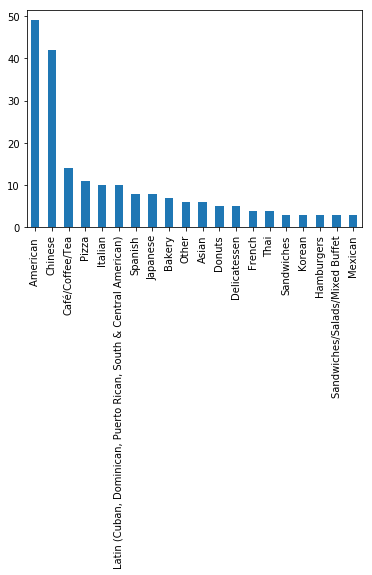

In [11]:
#check the values of violation code :

mask = df['VIOLATION CODE'].isnull()
clean_rest=df[mask].drop_duplicates(subset=['restaurant'])

mask1 = df['VIOLATION CODE'].notnull()
vio_rest=df[mask1].drop_duplicates(subset=['restaurant'])

#merge both the data sets

cleanest_rest=clean_rest.merge(vio_rest,left_on='restaurant',right_on='restaurant',how='left',suffixes=['_clean','_vio'])

cleanest_rest_vf=cleanest_rest[cleanest_rest['BORO_vio'].isnull()]

#left join with the original table 

df1=df.drop_duplicates(subset=['restaurant','CUISINE DESCRIPTION'])
org_tab=df1.merge(cleanest_rest_vf,left_on='restaurant',right_on='restaurant',how='left',suffixes=['_all','_clean'])

clean_all_rest=org_tab[org_tab['BORO_clean'].notnull()]

cuis_pop_clean=clean_all_rest['CUISINE DESCRIPTION'].value_counts()

top_cuis_clean=cuis_pop_clean[:20]
#print top_cuis_clean
top_cuis_clean.plot(kind='bar')



### 10 : Top 10 clean cuisines

Steps:
1. Take the cuisines which is served at least at the 20 restaurants by filtering the dataframe created in previous 2 questions
2. Divide it by total number of cuisin count and drop the NA rows
3. Sort this list and get the top 10 clean cuisines

In [85]:
top_cuis_clean[cuis_pop > 19]
cleanest=(top_cuis_clean[cuis_pop>19]/cuis_pop).dropna()
pd.Series.sort_values(cleanest,ascending=False)[:11]    # Since other is on top 10, top 11 cuisines have been shared

C:\Users\aishw\Anaconda2\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Other                             0.058252
Asian                             0.041096
Chinese                           0.038251
Delicatessen                      0.032680
Thai                              0.031250
Sandwiches/Salads/Mixed Buffet    0.028571
Donuts                            0.028409
Café/Coffee/Tea                   0.028112
French                            0.027397
Korean                            0.027273
Spanish                           0.025723
Name: CUISINE DESCRIPTION, dtype: float64

### 11 : Most common violations in each boro


Steps:
1. Remove 'Missing' boro
2. Group by violation desc and boro and find the count of restaurants in which it is served
3. Transpose the table to get the violations in rows and use idxmax to obtain the violation code for which there is maximum number of restaurant count is present for a particular boro

In [24]:
treat_rest=df[df.BORO != 'Missing']
#remove duplicates
#treat_rest= treat_rest.drop_duplicates(subset=['VIOLATION DESCRIPTION','BORO'])

boro_vio=treat_rest.groupby(['VIOLATION DESCRIPTION','BORO'], as_index=False).agg({"restaurant": "count"})

cross=pd.crosstab(boro_vio['VIOLATION DESCRIPTION'],boro_vio['BORO'],values=boro_vio['restaurant'], aggfunc='sum')

print cross.T.idxmax(axis=1)

#cross.iloc[0]


BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object


### 12 : Most common violation per boro

Steps:
1. Create a pivot of violation description
2. Create a pivot with violation descs and count the occurances 
3. Calculate total number of violation occurences and divide the pivot by the violation frequency - use apply for division
4. Use idx_max() to get the most common violation based on normalized frequency

In [33]:

vio_base = df[['BORO','VIOLATION CODE','VIOLATION DESCRIPTION']]
vio_base['cnt'] = 1
cross_vio = pd.pivot_table(vio_base, index=['VIOLATION CODE','VIOLATION DESCRIPTION'], columns='BORO', values='cnt', aggfunc=sum,fill_value = 0)

violationFrequency = cross_vio.sum(axis = 1)

def division(k):
    return k / violationFrequency

norm_vio = cross_vio.apply(division)
#Step 4:
norm_vio=pd.DataFrame(norm_vio.idxmax()).reset_index()
norm_vio.columns=['BORO','VIOLATION DESCRIPTION']
norm_vio
#The values are different if only violation description is considered compared to the combination of violation code along with violation description


C:\Users\aishw\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,BORO,VIOLATION DESCRIPTION
0,BRONX,"(04I, Unprotected food re-served.)"
1,BROOKLYN,"(02D, Precooked potentially hazardous food fro..."
2,MANHATTAN,"(03E, Potable water supply inadequate. Water o..."
3,Missing,"(10J, ''''Wash hands sign not posted at hand ..."
4,QUEENS,"(03G, Raw food not properly washed prior to se..."
5,STATEN ISLAND,"(03C, Eggs found dirty/cracked; liquid, frozen..."


### 13 : Area Code Extraction

Steps:
1. Extract first 3 digits by .str 
2. Drop the duplicates for zip code and area code 
3. Count the #zip codes for area codes
4. Filter for the areas where #zips= 1 and count the length of filtered data frame

In [36]:
df['AREA CODE'] = df['PHONE'].str[0:3]
#df.iloc[0]

zip_uniq=df.drop_duplicates(subset=['ZIPCODE','AREA CODE'])

uniq_zip=zip_uniq.groupby('AREA CODE', as_index=False).agg({"ZIPCODE": "count"})
uniq_zip=uniq_zip[uniq_zip['ZIPCODE']==1]
print "Area Codes with unique zip codes" , len(uniq_zip)


Area Codes with unique zip codes 34


### 14 : Find common misspellings of street names

Steps:
1. Split the street to separate out the words
2. Select last word from the list of splitted street name
3. Select rest of the list items by creating a custom function and using map to iterate the function
4. Create new column by concatenating street base and zip code
5. Remove the rows with null street base
6. Self join and filter for the rows where 2 street types do not match
7. Create a cross tab with the frequency of street type mismatch
8. Use idxmax() to find the index of the most frequent spelling error

In [19]:
df['STREET SPLIT']=df['STREET'].str.split(" ")


df['STREET TYPE']=df['STREET SPLIT'].str[-1]


def base(s):
    k = " "
    l = k.join(s[0:len(s)-1])
    return(l)

df['STREET BASE']= df['STREET SPLIT'].map(base)
df['STREET BASE & ZIP']=df['STREET BASE']+" "+ df['ZIPCODE']


uniq_street=df.drop_duplicates(subset=['STREET TYPE','STREET BASE','STREET BASE & ZIP'])

# Remove all the empty street base

uniq_street=uniq_street[uniq_street['STREET BASE']!=""]

#uniq_street1=df['STREET BASE'].drop_duplicates(subset=['STREET TYPE','STREET BASE','BASE & ZIP']).replace('', np.nan).dropna()


# Select only the 3 columns
uniq_street=uniq_street[['STREET TYPE','STREET BASE','STREET BASE & ZIP']]

#uniq_street.iloc[0:2]

#Self join

uniq_street=uniq_street.merge(uniq_street,on='STREET BASE & ZIP',suffixes=['_x','_y'])\

#print len(uniq_street)


uniq_street_merg=uniq_street[uniq_street['STREET TYPE_x'] != uniq_street['STREET TYPE_y']]

spell_var=pd.crosstab(uniq_street_merg['STREET TYPE_y'],uniq_street_merg['STREET TYPE_x'])
#print spell_var[:5]


#Find most common street type
str_type=['AVE', 'ST', 'RD', 'PL', 'BOULEARD','BULEVARD']

for str_tp in str_type:
        print "Most common variation for "+str_tp+": "+spell_var[str_tp].idxmax()


Most common variation for AVE: AVENUE
Most common variation for ST: STREET
Most common variation for RD: ROAD
Most common variation for PL: PLACE
Most common variation for BOULEARD: BLVD
Most common variation for BULEVARD: BLVD
